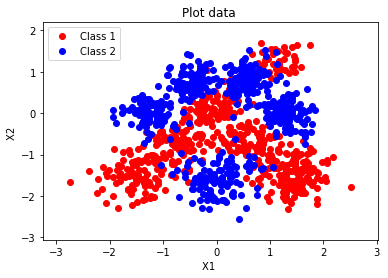

In [1]:
import numpy as np
from DataPlot import *
%matplotlib inline

X = np.loadtxt('X.txt')
y1 = np.loadtxt('y.txt')

# visualize the dataset
plot_data(X, y1)



In [2]:
y = y1.reshape(1000, 1)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


# split the dataset into training and test sets
indices=np.random.permutation(X.shape[0])
train_id, test_id = indices[:800], indices[800:]
X_train, X_test = X[train_id, :], X[test_id, :]
y_train, y_test = y[train_id], y[test_id]

In [3]:
# define functions for training

def sigmoid(w, X):
    return 1.0 / (1 + np.exp(-np.dot(X, w)))

def gradAscent(dataset, label):
    learnRate = 0.001
    iterations = 500
    weights = np.ones((3, 1))
    for i in range(iterations):
        s = sigmoid(weights, dataset)
        gradient = np.dot(np.transpose(dataset), np.subtract(label, s))
        weights = weights + learnRate * gradient
    return weights

w = gradAscent(X_train, y_train)

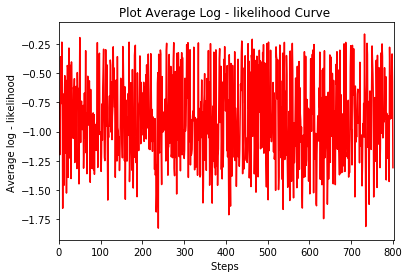

In [4]:
ll=np.log(np.abs(y_train - sigmoid(w, X_train)))
plot_ll(ll)